In [33]:
#패키지 임포트
import os
import warnings

#FutureWarning 제거
warnings.simplefilter(action='ignore', category = FutureWarning)

In [34]:
import pandas as pd
import numpy as np
from scipy import stats

In [35]:
#시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

#값이 깨지는 문제 해결을 위한 파라미터값 설정
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [37]:
#베르누이분포 정의
mu = 0.7
bern = stats.bernoulli(mu)

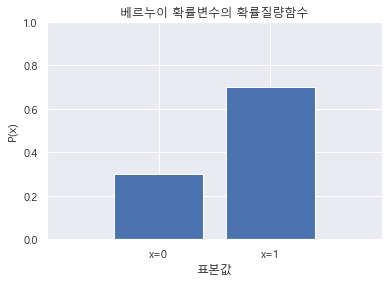

In [38]:
#확률질량함수 계산 및 시각화
b_x = [0, 1]
bern_pmf = bern.pmf(b_x)

#시각화
plt.bar(b_x, bern_pmf)
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [39]:
#베르누이 검정을 위한 베르누이 샘플 100개 생성
x_sample_bern = bern.rvs(100, random_state =0)
x_sample_bern

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [40]:
#베르누이 시뮬레이션
y_bern = np.bincount(x_sample_bern, minlength =2) / float(len(x_sample_bern))
df_bern = pd.DataFrame({"결과": bern_pmf, "검증(시뮬레이션)" : y_bern})
df_bern.index = [0, 1]
df_bern

,결과,검증(시뮬레이션)
0,0.3,0.23
1,0.7,0.77


In [41]:
#scipy 이항분포 확률질량함수 계산
#0.3 확률 갖는 15회 실험에서 3회 성공할 확률
print("k=3, n=15, p=0.3의 PMF:", stats.binom.pmf(3, n=15, p=0.3))
#0.3 확률 갖는 15회 실험에서 0~4회 성공할 확률의 누적값
print("k=0~4, n=15, p=0.3의 PMF:", stats.binom.cdf(4, n=15, p=0.3))

k=3, n=15, p=0.3의 PMF: 0.17004021326428484
k=0~4, n=15, p=0.3의 PMF: 0.5154910592268434


In [42]:
#p의 확률을 갖는 n회 시행에서 k회 성공할 확률 반환 함수 생성
def bion_dist(k, n, p):
    pmf_bion = stats.binom.pmf(k, n=n, p=p)
    return pmf_bion

#0~15 범위 생성 : 성공 횟수
x = np.arange(0, 16)

#확률질량함수 값 array
pdf_result = [bion_dist(k, 15, 0.3) for k in range (0, 16)]

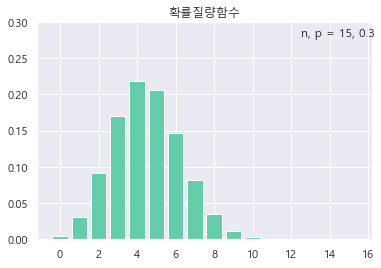

In [43]:
#시각화
plt.title("확률질량함수")
plt.ylim(0, 0.3)
plt.text(12.5, 0.28, 'n, p = 15, 0.3')
plt.bar(x, pdf_result, color = 'mediumaquamarine')

#plt.plot(x, pdf_result, color = 'lightcoral')
plt.show()

In [44]:
#scipy 포아송 함수
#3번 시행에서 평균 사건 수 (기대값 2)에 대한 발생 확률
stats.poisson.pmf(3, 2, loc=0)

0.18044704431548356

In [45]:
#n번 시행에서 평균 사건 수 (기대값, 람다)에 대한 발생 확률 함수
def pois_dist(n, lamb):
    pmf_poi = stats.poisson.pmf(n, lamb, loc=0)
    return pmf_poi
# 확률질량함수의 값 array
x = np.arange(0, 41)
poi_pdf_result = [pois_dist(n, 10) for n in range (0, 41)]

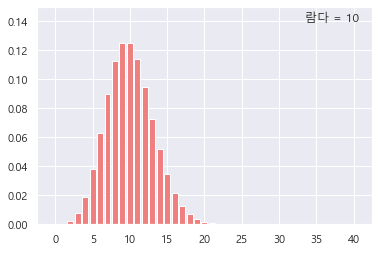

In [46]:
plt.ylim(0, 0.15)
plt.text(33.5, 0.14, '람다 = 10')
plt.bar(x, poi_pdf_result, color = 'lightcoral')
plt.show()

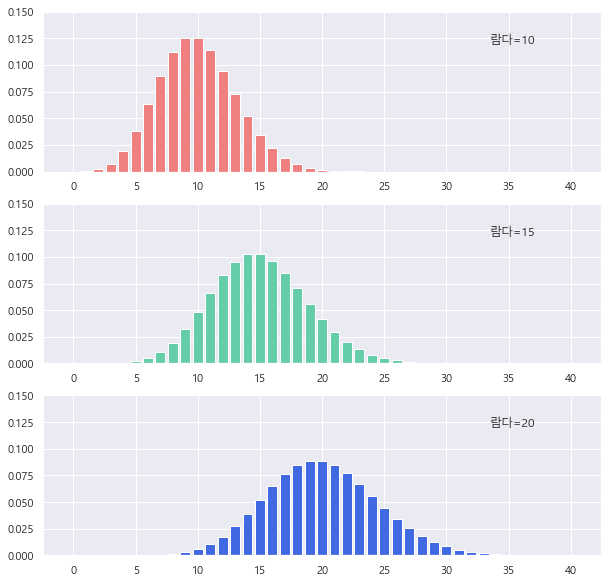

In [47]:
#기대값에 따른 포아송분포 차이 확인
x = np.arange(0, 41)

fig = plt.figure(figsize = (10, 10))

fig.add_subplot(3, 1, 1)
pmf_poin1 = np.array([pois_dist(n, 10) for n in range(0, 41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다=10')
plt.bar(x, pmf_poin1, color='lightcoral')

fig.add_subplot(3, 1, 2)
pmf_poin2 = np.array([pois_dist(n, 15) for n in range(0, 41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다=15')
plt.bar(x, pmf_poin2, color='mediumaquamarine')

fig.add_subplot(3, 1, 3)
pmf_poin3 = np.array([pois_dist(n, 20) for n in range(0, 41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다=20')
plt.bar(x, pmf_poin3, color='royalblue')

plt.show()